In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import zipfile
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/107.7 GB disk)


# Load Dataset

In [ ]:
def unzip(zip_file=None):
  try:
    with zipfile.ZipFile(zip_file, 'r') as f:
      f.extractall()
      print("Extracted All")
  except Exception as e:
    print(e)

In [ ]:
os.chdir("/content/drive/MyDrive/Dataset/Face detection")
os.getcwd()

'/content/drive/MyDrive/Dataset/Face detection'

In [ ]:
zip_file_data = "/content/drive/MyDrive/Dataset/Face detection/face detection.v1i.yolov8.zip"
unzip(zip_file_data)

Extracted All


In [ ]:
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/train/images" | wc -l
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/valid/images" | wc -l
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/test/images" | wc -l

2920
285
23


In [ ]:
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/train/labels" | wc -l
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/valid/labels" | wc -l
!ls -1 "/content/drive/MyDrive/Dataset/Face detection/test/labels" | wc -l

2920
285
23


In [ ]:
def plot_images(img_path, label_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  h, w, _ = img.shape
  font_size = min(h, w) * 0.05
  font_scale = cv2.getFontScaleFromHeight(cv2.FONT_HERSHEY_SIMPLEX, int(font_size), 3)

  with open(label_path, 'r') as f:
    labels = f.readlines()

  class_name = ["Female", "Male"]
  colors = [(255, 0, 245), (0, 5, 255)]

  for label in labels:
    label = label.strip().split()
    class_id = int(label[0])
    x_c, y_c, width, height = map(float, label[1:])

    x1 = int((x_c - width/2) * w)
    y1 = int((y_c - height/2) * h)
    x2 = int((x_c + width/2) * w)
    y2 = int((y_c + height/2) * h)

    cv2.rectangle(img, (x1, y1), (x2, y2), colors[class_id], 2)
    cv2.putText(img, class_name[class_id], (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, font_scale, colors[class_id], 3)


  plt.imshow(img)
  plt.axis("off")
  plt.show()

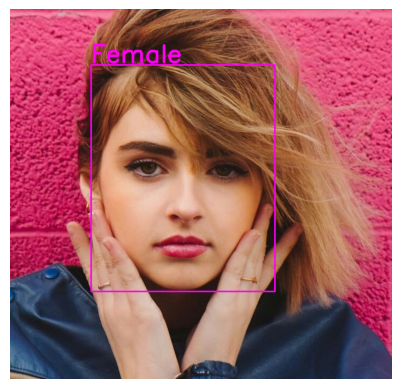

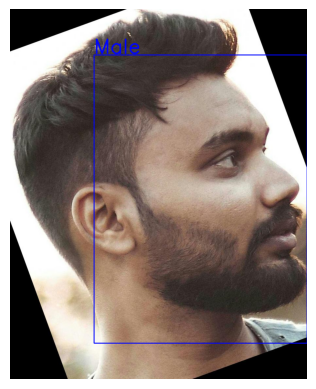

In [ ]:
img1 = "/content/drive/MyDrive/Dataset/Face detection/train/images/0001_jpg.rf.1939a08b3919e0fbe2d618ea9d4aa027.jpg"
label1 = "/content/drive/MyDrive/Dataset/Face detection/train/labels/0001_jpg.rf.1939a08b3919e0fbe2d618ea9d4aa027.txt"
img2 = "/content/drive/MyDrive/Dataset/Face detection/train/images/20240609_193207_jpg.rf.b715069bfe4c51f6cb1b3481aa92fd8f.jpg"
label2 = "/content/drive/MyDrive/Dataset/Face detection/train/labels/20240609_193207_jpg.rf.b715069bfe4c51f6cb1b3481aa92fd8f.txt"
plot_images(img1, label1)
plot_images(img2, label2)

# Train Model with finetuning YOLO Model

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Dataset/Face detection'

In [ ]:
# finetuning hyperparameter
model = YOLO("yolov8n.pt")
data = "/content/drive/MyDrive/Dataset/Face detection/data.yaml"
epochs = 50
batch = 16
device = "cuda"

In [ ]:
model.train(data=data, epochs=epochs, batch=batch, device=device)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Dataset/Face detection/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Dataset/Face detection/train/labels.cache... 2920 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2920/2920 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.4' (you have '2.0.3'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Dataset/Face detection/valid/labels.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.18G      1.074      1.879      1.591         20        640: 100%|██████████| 183/183 [10:33<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        285        285       0.81      0.567      0.708      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.101      1.353      1.575         14        640: 100%|██████████| 183/183 [01:13<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.99it/s]

                   all        285        285      0.745      0.779      0.818      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.15G      1.106      1.224      1.566         21        640: 100%|██████████| 183/183 [01:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.46it/s]

                   all        285        285      0.784      0.762      0.835      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.15G      1.071      1.094      1.531         22        640: 100%|██████████| 183/183 [01:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        285        285      0.771      0.695      0.804      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.15G       1.02      1.021      1.498         23        640: 100%|██████████| 183/183 [01:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        285        285      0.839      0.731      0.851      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G     0.9604     0.9625      1.453         21        640: 100%|██████████| 183/183 [01:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.44it/s]

                   all        285        285      0.857      0.856      0.932      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.15G     0.9612     0.9244      1.446         19        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        285        285      0.938      0.898      0.963       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.15G     0.9429     0.9007      1.442         18        640: 100%|██████████| 183/183 [01:13<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.94it/s]

                   all        285        285      0.833       0.66      0.812      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.15G     0.9065      0.862      1.409         19        640: 100%|██████████| 183/183 [01:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.91it/s]

                   all        285        285      0.955      0.905      0.973      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.14G     0.8972     0.8261      1.398         26        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.65it/s]

                   all        285        285      0.947       0.87      0.951      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G     0.8744     0.8201      1.377         17        640: 100%|██████████| 183/183 [01:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.05it/s]

                   all        285        285      0.933       0.87      0.963      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.15G     0.8521     0.7624      1.365         20        640: 100%|██████████| 183/183 [01:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.86it/s]

                   all        285        285      0.933      0.885      0.944      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.15G     0.8583     0.7688      1.365         26        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        285        285      0.824      0.789      0.867      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.14G     0.8341     0.7439      1.352         18        640: 100%|██████████| 183/183 [01:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        285        285      0.949      0.891      0.965      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.15G     0.8243     0.7378      1.344         25        640: 100%|██████████| 183/183 [01:13<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        285        285      0.958      0.951      0.979      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.15G     0.8034     0.7236      1.327         18        640: 100%|██████████| 183/183 [01:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.09it/s]

                   all        285        285      0.943      0.947      0.981      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.15G     0.8121     0.7014      1.328         23        640: 100%|██████████| 183/183 [01:10<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.62it/s]

                   all        285        285      0.921      0.814      0.925      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.14G     0.7907     0.7082      1.316         21        640: 100%|██████████| 183/183 [01:12<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.79it/s]

                   all        285        285      0.946       0.93      0.976      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G     0.7906     0.6904      1.313         15        640: 100%|██████████| 183/183 [01:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        285        285      0.928      0.909      0.972      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.15G     0.7711     0.6692      1.297         22        640: 100%|██████████| 183/183 [01:08<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.90it/s]

                   all        285        285      0.978      0.927      0.972      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.15G     0.7506     0.6316      1.282         21        640: 100%|██████████| 183/183 [01:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        285        285      0.958      0.878      0.959      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.14G     0.7426      0.626      1.281         29        640: 100%|██████████| 183/183 [01:09<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        285        285       0.97        0.9      0.964      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.15G     0.7457     0.6358      1.284         25        640: 100%|██████████| 183/183 [01:09<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.93it/s]

                   all        285        285      0.978      0.932      0.984      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.15G     0.7388     0.6049      1.272         20        640: 100%|██████████| 183/183 [01:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]

                   all        285        285      0.951      0.951      0.985      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.15G     0.7222     0.5937      1.254         16        640: 100%|██████████| 183/183 [01:12<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.89it/s]

                   all        285        285       0.93      0.931      0.975      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.14G     0.7132     0.5959      1.252         24        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]

                   all        285        285      0.943      0.853      0.943      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.15G     0.7018     0.5826       1.25         22        640: 100%|██████████| 183/183 [01:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.55it/s]

                   all        285        285      0.946      0.922       0.97      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.15G     0.6956     0.5556      1.245         20        640: 100%|██████████| 183/183 [01:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        285        285      0.902      0.906      0.944      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.15G     0.6926     0.5549      1.239         26        640: 100%|██████████| 183/183 [01:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.50it/s]

                   all        285        285      0.961      0.944      0.981      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.14G     0.6885     0.5595      1.241         20        640: 100%|██████████| 183/183 [01:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.84it/s]

                   all        285        285      0.964      0.944      0.978       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.15G     0.6727     0.5481      1.227         22        640: 100%|██████████| 183/183 [01:12<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        285        285      0.964      0.929      0.974      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.15G     0.6696       0.53      1.222         21        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        285        285      0.985      0.918      0.981      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.15G     0.6535     0.5158      1.212         25        640: 100%|██████████| 183/183 [01:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]

                   all        285        285      0.939      0.912       0.97      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.14G     0.6436     0.5191      1.205         26        640: 100%|██████████| 183/183 [01:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.78it/s]

                   all        285        285       0.96      0.933      0.982      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.15G     0.6324     0.5066      1.193         18        640: 100%|██████████| 183/183 [01:11<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.18it/s]

                   all        285        285      0.945      0.906      0.963       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.15G     0.6326     0.4972      1.193         25        640: 100%|██████████| 183/183 [01:10<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        285        285      0.971      0.926       0.98      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.15G     0.6233     0.4867      1.192         25        640: 100%|██████████| 183/183 [01:08<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.67it/s]

                   all        285        285      0.971      0.938       0.99      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.14G      0.622     0.4769      1.193         22        640: 100%|██████████| 183/183 [01:11<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.02it/s]

                   all        285        285      0.957      0.935      0.979      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.15G     0.6177     0.4698      1.188         19        640: 100%|██████████| 183/183 [01:09<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        285        285      0.974      0.931      0.985      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.15G     0.6068      0.463      1.173         27        640: 100%|██████████| 183/183 [01:09<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.69it/s]

                   all        285        285      0.981      0.924       0.98      0.838


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.15G     0.5547     0.3394       1.24          8        640: 100%|██████████| 183/183 [01:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.76it/s]

                   all        285        285      0.974      0.947      0.982      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G     0.5288     0.3216      1.214          8        640: 100%|██████████| 183/183 [01:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.13it/s]

                   all        285        285      0.975      0.939      0.979      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.15G     0.5062     0.3052      1.197          8        640: 100%|██████████| 183/183 [01:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.88it/s]

                   all        285        285      0.984      0.937      0.978      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.15G     0.5053     0.2977      1.192          8        640: 100%|██████████| 183/183 [01:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.68it/s]

                   all        285        285      0.975      0.957      0.987      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.15G     0.4795     0.2882      1.173          8        640: 100%|██████████| 183/183 [01:08<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.12it/s]

                   all        285        285      0.977      0.944      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.14G     0.4685     0.2747      1.159          8        640: 100%|██████████| 183/183 [01:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        285        285      0.985      0.926      0.984      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.15G     0.4584     0.2678      1.147          8        640: 100%|██████████| 183/183 [01:05<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.42it/s]

                   all        285        285      0.985      0.918      0.985      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.15G     0.4469      0.261      1.138          8        640: 100%|██████████| 183/183 [01:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.23it/s]

                   all        285        285      0.954      0.954      0.986      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G     0.4417     0.2534      1.129          8        640: 100%|██████████| 183/183 [01:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.79it/s]

                   all        285        285      0.968      0.948      0.985      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G     0.4301     0.2493      1.121          8        640: 100%|██████████| 183/183 [01:06<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.92it/s]

                   all        285        285      0.971      0.951      0.986      0.843



50 epochs completed in 1.198 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]


                   all        285        285      0.968      0.949      0.985      0.847
                  Male        285        285      0.968      0.949      0.985      0.847
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c7f9103e10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Evaluasi dan Prediksi Model

In [ ]:
model.val()

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/Dataset/Face detection/valid/labels.cache... 285 images, 0 backgrounds, 0 corrupt: 100%|██████████| 285/285 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.72it/s]


                   all        285        285      0.971      0.937      0.984      0.847
                  Male        285        285      0.971      0.937      0.984      0.847
Speed: 3.2ms preprocess, 7.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c7f8e38990>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model.predict(source="/content/drive/MyDrive/Dataset/Face detection/test/images", save=False)


image 1/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_201828_jpg.rf.e1d51ab12b3e82baac058ae0d13fa57f.jpg: 640x640 1 Female, 1 Male, 7.5ms
image 2/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_201858_jpg.rf.28d0f8146088561a9865b15fa48e9da2.jpg: 640x384 1 Male, 10.3ms
image 3/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_202033_jpg.rf.95b071118f14f3f775db6fc393b1f56d.jpg: 640x640 1 Female, 8.0ms
image 4/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_202129_jpg.rf.67aedca5342f7c0e2928f03fbae70daa.jpg: 640x480 1 Male, 7.5ms
image 5/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_202200_jpg.rf.1f107261cc39e8ed58508ddcf5195d83.jpg: 640x512 1 Male, 7.1ms
image 6/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_202224_jpg.rf.e0d10fe4af2941c9583e36a72f9c79f0.jpg: 640x416 1 Male, 7.5ms
image 7/23 /content/drive/MyDrive/Dataset/Face detection/test/images/20240

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Female', 1: 'Male'}
 obb: None
 orig_img: array([[[142, 144, 102],
         [142, 144, 102],
         [142, 143, 103],
         ...,
         [174, 175, 143],
         [174, 175, 143],
         [174, 175, 143]],
 
        [[142, 144, 102],
         [142, 144, 102],
         [142, 143, 103],
         ...,
         [174, 175, 143],
         [174, 175, 143],
         [174, 175, 143]],
 
        [[142, 144, 102],
         [142, 144, 102],
         [142, 143, 103],
         ...,
         [174, 175, 143],
         [174, 175, 143],
         [174, 175, 143]],
 
        ...,
 
        [[120, 184, 202],
         [125, 187, 205],
         [134, 190, 207],
         ...,
         [ 53,  49,  20],
         [ 57,  53,  24],
         [ 81,  77,  48]],
 
        [[125, 187, 205],
         [125, 184, 203],
         [136, 188, 205],
         ...,
       

In [ ]:
test_path = "/content/drive/MyDrive/Dataset/Face detection/test/images/20240609_201858_jpg.rf.28d0f8146088561a9865b15fa48e9da2.jpg"

In [ ]:
test_result = model(test_path, save=False)


image 1/1 /content/drive/MyDrive/Dataset/Face detection/test/images/20240609_201858_jpg.rf.28d0f8146088561a9865b15fa48e9da2.jpg: 640x384 1 Male, 13.6ms
Speed: 3.6ms preprocess, 13.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
def plot_predict(img_path, results):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  for r in results:
    boxes = r.boxes.xyxy.cpu().numpy()
    conf = r.boxes.conf.cpu().numpy()
    cls = r.boxes.cls.cpu().numpy()

    for i in range(len(boxes)):
      x1, y1, x2, y2 = boxes[i].astype(int)
      conf = float(conf[i]) if isinstance(conf, np.ndarray) else float(conf)
      cls = int(cls[i]) if isinstance(cls, np.ndarray) else int(cls)
      label = "Female" if cls == 0 else "Male"
      confidence = f"{conf:.2f}"
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cv2.putText(img, f"{label} {confidence}", (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
  plt.imshow(img)
  plt.axis("off")
  plt.show()

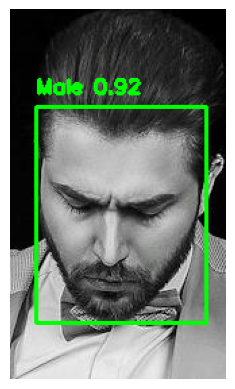

In [ ]:
plot_predict(test_path, test_result)

# Save Model

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Dataset/Face detection'

In [ ]:
os.chdir("/content/drive/MyDrive/Model")
os.mkdir("Face Detection")
os.getcwd()

'/content/drive/MyDrive/Model'

In [ ]:
os.chdir("/content/drive/MyDrive/Model/Face Detection")
os.getcwd()

'/content/drive/MyDrive/Model/Face Detection'

In [ ]:
# save model for serving deployment
model.save("face_detection.pt")

In [ ]:
# save model for edge AI
model = YOLO("/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.pt")
model.export(format="onnx")

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)

ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.48...
ONNX: export success ✅ 1.1s, saved as '/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (1.6s)
Results saved to /content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights
Predict:         yolo predict task=detect model=/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.onnx imgsz=640 data=/content/drive/MyDrive/Dataset/Fac

'/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.onnx'

In [ ]:
shutil.copy("/content/drive/MyDrive/Dataset/Face detection/runs/detect/train/weights/best.onnx", "/content/drive/MyDrive/Model/Face Detection")

'/content/drive/MyDrive/Model/Face Detection/best.onnx'